In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:
import pandas as pd
import os
import datetime as dt

# Directorio donde se encuentran los archivos
directory = 'directory/'

# Obtener la lista de archivos en la carpeta
file_list = [f for f in os.listdir(directory) if f.endswith('.txt')]

# Fechas de inicio y fin para el filtro
start_date = dt.datetime(2013, 4, 1)
end_date = dt.datetime(2017, 4, 1)

# Función para leer y filtrar un dataframe
def read_and_filter_txt(file_path, start_date, end_date):
    df = pd.read_csv(file_path, delimiter=',')
    # Convertir la columna 'Date' a datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # Establecer la columna 'Date' como índice
    df.set_index('Date', inplace=True)
    # Filtrar el dataframe por el rango de fechas
    filtered_df = df.loc[start_date:end_date]
    return filtered_df

# Leer y filtrar cada archivo en un dataframe y almacenarlos en un diccionario
dataframes = {}
for file in file_list:
    file_path = os.path.join(directory, file)
    df = read_and_filter_txt(file_path, start_date, end_date)
    # Asignar el dataframe al diccionario con el nombre del archivo (sin extensión) como clave
    file_name = os.path.splitext(file)[0]
    dataframes[file_name] = df

# Verificar los dataframes
for name, df in dataframes.items():
    print(f"DataFrame for {name}:\n{df.head()}\n")

# Acceder a un dataframe específico por su nombre
data = dataframes.get('aapl.us', None)
if data is not None:
    print(data.head())
else:
    print("El dataframe no se encontró.")



DataFrame for nvda.us:
              Open    High     Low   Close    Volume  OpenInt
Date                                                         
2013-04-01  12.027  12.027  11.576  11.658  11783456        0
2013-04-02  11.668  11.696  11.463  11.529   9886120        0
2013-04-03  11.510  11.586  11.311  11.396   9380419        0
2013-04-04  11.360  11.549  11.320  11.501   7842043        0
2013-04-05  11.340  11.705  11.311  11.705  14671294        0

DataFrame for aapl.us:
              Open    High     Low   Close     Volume  OpenInt
Date                                                          
2013-04-01  57.459  57.663  55.584  55.740  107028495        0
2013-04-02  55.568  56.939  55.413  55.852  145557726        0
2013-04-03  56.057  56.827  55.920  56.138   99768431        0
2013-04-04  56.368  56.529  55.262  55.582   98519648        0
2013-04-05  55.167  55.221  54.537  54.995  105265358        0

DataFrame for amzn.us:
              Open    High     Low   Close   Volume  O

In [3]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1] 
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(808, 1) (202, 1)


In [4]:
# Selecting Open Price values
dataset_train = train_data.Open.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape


(808, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])



[[0.09102543]
 [0.06658222]
 [0.07290307]
 [0.07692308]
 [0.06139886]]


In [6]:
# Selecting Open Price values
dataset_test = test_data.Open.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1)) 
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test) 
print(*scaled_test[:5])

[0.08269622] [0.09207038] [0.0664067] [0.06959545] [0.05801222]


In [7]:

X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

X_trainS = []
y_trainS = []
for i in range(50, len(scaled_train)):
    X_trainS.append(scaled_train[i-5:i, 0])
    y_trainS.append(scaled_train[i, 0])
    if i <= 51:
        print(X_trainS)
        print(y_trainS)
        print()


[array([0.09102543, 0.06658222, 0.07290307, 0.07692308, 0.06139886,
       0.06196761, 0.06450112, 0.06757752, 0.07687137, 0.07759523,
       0.06558691, 0.05643525, 0.05427659, 0.02852785, 0.        ,
       0.00845365, 0.02693794, 0.0093714 , 0.0390626 , 0.0366842 ,
       0.05475486, 0.07918514, 0.09486447, 0.09040497, 0.1063816 ,
       0.11378825, 0.12936417, 0.11938524, 0.12579657, 0.12268139,
       0.11174593, 0.11574008, 0.09089616, 0.06398408, 0.0907152 ,
       0.07859054, 0.08916407, 0.09915593, 0.08542843, 0.09377868,
       0.1090056 , 0.09229218, 0.10185748, 0.11343924, 0.11044039,
       0.11464137, 0.10185748, 0.10154725, 0.08637204, 0.1002805 ])]
[0.08510528288716823]

[array([0.09102543, 0.06658222, 0.07290307, 0.07692308, 0.06139886,
       0.06196761, 0.06450112, 0.06757752, 0.07687137, 0.07759523,
       0.06558691, 0.05643525, 0.05427659, 0.02852785, 0.        ,
       0.00845365, 0.02693794, 0.0093714 , 0.0390626 , 0.0366842 ,
       0.05475486, 0.07918514, 0.09

In [8]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])
X_testS = []
y_testS = []
for i in range(50, len(scaled_test)):
	X_testS.append(scaled_test[i-5:i, 0])
	y_testS.append(scaled_test[i, 0])


In [9]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to Numpy array
X_trainS, y_trainS = np.array(X_trainS), np.array(y_trainS)

#Reshaping
X_trainS = np.reshape(X_trainS, (X_trainS.shape[0], X_trainS.shape[1],1))
y_trainS = np.reshape(y_trainS, (y_trainS.shape[0],1))
print("X_train :",X_trainS.shape,"y_train :",y_trainS.shape)


X_train : (758, 50, 1) y_train : (758, 1)
X_train : (758, 5, 1) y_train : (758, 1)


In [10]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

# The data is converted to numpy array
X_testS, y_testS = np.array(X_testS), np.array(y_testS)

#Reshaping
X_testS = np.reshape(X_testS, (X_testS.shape[0], X_testS.shape[1],1))
y_testS = np.reshape(y_testS, (y_testS.shape[0],1))
print("X_testS :",X_testS.shape,"y_testS :",y_testS.shape)


X_test : (152, 50, 1) y_test : (152, 1)
X_testS : (152, 5, 1) y_testS : (152, 1)


In [11]:

# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


2024-05-20 18:57:41.702996: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								decay=1e-6, 
								momentum=0.9, 
								nesterov=True), 
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 1)
regressor.summary()


2024-05-20 18:57:43.263512: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 18:57:43.269508: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 18:57:43.269573: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 18:57:43.273290: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 18:57:43.273364: I external/local_xla/xla/stream_executor

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
I0000 00:00:1716231467.885291    2530 service.cc:145] XLA service 0x7fad5c00abe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716231467.885352    2530 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-05-20 18:57:47.966641: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-20 18:57:48.152290: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


  3/758 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - loss: 0.1515

I0000 00:00:1716231469.969638    2530 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


758/758 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - loss: 0.0791
Epoch 2/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 0.0079
Epoch 3/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - loss: 0.0048
Epoch 4/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - loss: 0.0041
Epoch 5/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 0.0031
Epoch 6/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - loss: 0.0029
Epoch 7/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - loss: 0.0025
Epoch 8/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - loss: 0.0030
Epoch 9/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - loss: 0.0029
Epoch 10/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - loss: 0.0026
Epoch 11/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - loss: 0.0026
Epoch 12/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - loss: 0.0024
Epoch 13/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - loss: 0.0027
Epoch 14/20
758/758 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - loss: 0.0022
Epoch 15/20
758/758 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [13]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 3.8163e-04 - loss: 0.0119
Epoch 2/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.0010 - loss: 0.0020
Epoch 3/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.0027 - loss: 0.0016
Epoch 4/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 3.2272e-04 - loss: 0.0016
Epoch 5/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.0010 - loss: 0.0012
Epoch 6/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 9.4573e-04 - loss: 9.1149e-04
Epoch 7/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.0015 - loss: 7.9729e-04
Epoch 8/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 3.2050e-04 - loss: 7.7381e-04
Epoch 9/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.0021 - loss: 8.0584e-04
Epoch 10/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.0344e-05 - loss: 7.8036e-04
Epoch 11/12
758/758 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 3.8628e-04 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [15]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, Dropout
from keras.optimizers import SGD
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, MultiHeadAttention, LayerNormalization, Add

In [16]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim,
                        dropout=0, attention_axes=1):
  """
  Creates a single transformer block.
  """
  x = layers.LayerNormalization(epsilon=1e-6)(inputs)
  x = layers.MultiHeadAttention(
      key_dim=head_size, num_heads=num_heads, dropout=dropout,
      attention_axes=attention_axes
      )(x, x)
  x = layers.Dropout(dropout)(x)
  res = x + inputs

    # Feed Forward Part
  x = layers.LayerNormalization(epsilon=1e-6)(res)
  x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
  x = layers.Dropout(dropout)(x)
  x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
  return x + res

def build_transfromer(head_size, 
                      num_heads,
                      ff_dim,
                      num_trans_blocks,
                      mlp_units, dropout=0, mlp_dropout=0) -> tf.keras.Model:
  """
  Creates final model by building many transformer blocks.
  """
  n_timesteps, n_features, n_outputs = 5, 1, 1 
  inputs = tf.keras.Input(shape=(n_timesteps, n_features))
  x = inputs 
  for _ in range(num_trans_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
  
  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = layers.Dense(dim, activation="relu")(x)
    x = layers.Dropout(mlp_dropout)(x)

  outputs = layers.Dense(n_outputs, activation='relu')(x)
  return tf.keras.Model(inputs, outputs)

transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2, 
                                num_trans_blocks=4, mlp_units=[256], 
                                mlp_dropout=0.10, dropout=0.10, 
                                )

transformer.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae", 'mape'],
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, 
                                              restore_best_weights=True)]

transformer.fit(X_trainS, y_trainS, batch_size=1,
                    epochs=25, validation_data=(X_testS, y_testS),
                    verbose=1, callbacks=callbacks)
transformer.summary()

Epoch 1/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 0.0101 - mae: 0.0677 - mape: 21.7154 - val_loss: 0.0011 - val_mae: 0.0241 - val_mape: 5.5595
Epoch 2/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0029 - mae: 0.0414 - mape: 9.7472 - val_loss: 0.0017 - val_mae: 0.0323 - val_mape: 6.4950
Epoch 3/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0019 - mae: 0.0331 - mape: 7.9609 - val_loss: 0.0011 - val_mae: 0.0262 - val_mape: 5.9001
Epoch 4/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0016 - mae: 0.0303 - mape: 8.0434 - val_loss: 0.0017 - val_mae: 0.0323 - val_mape: 6.7329
Epoch 5/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0016 - mae: 0.0296 - mape: 7.7347 - val_loss: 0.0012 - val_mae: 0.0268 - val_mape: 5.6395
Epoch 6/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0014 - mae: 0.0281 - mape: 7.8058 - val_loss: 0.0012 - val_mae: 0.0284 - val_mape: 6.7715
Epoch 7/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0017 - mae: 0.0307 - map

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 5, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 5, 1)      │          2 │ input_layer_2[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 1)      │      3,585 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 5, 1)      │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 5, 1)      │          0 │ dropout_2[0][0],  │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 5, 2)      │          4 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 5, 2)      │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 5, 1)      │          3 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 5, 1)      │          0 │ conv1d_1[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 1)      │      3,585 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 5, 1)      │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 5, 1)      │          0 │ dropout_5[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 5, 2)      │          4 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 5, 2)      │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 5, 1)      │          3 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 5, 1)      │          0 │ conv1d_3[0][0],   │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 48,533 (189.59 KB)

 Trainable params: 16,177 (63.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,356 (126.39 KB)

In [17]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_transformer = transformer.predict(X_testS)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fad4183b920> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 508ms/step


In [18]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_transformer_0 = scaler.inverse_transform(y_transformer)

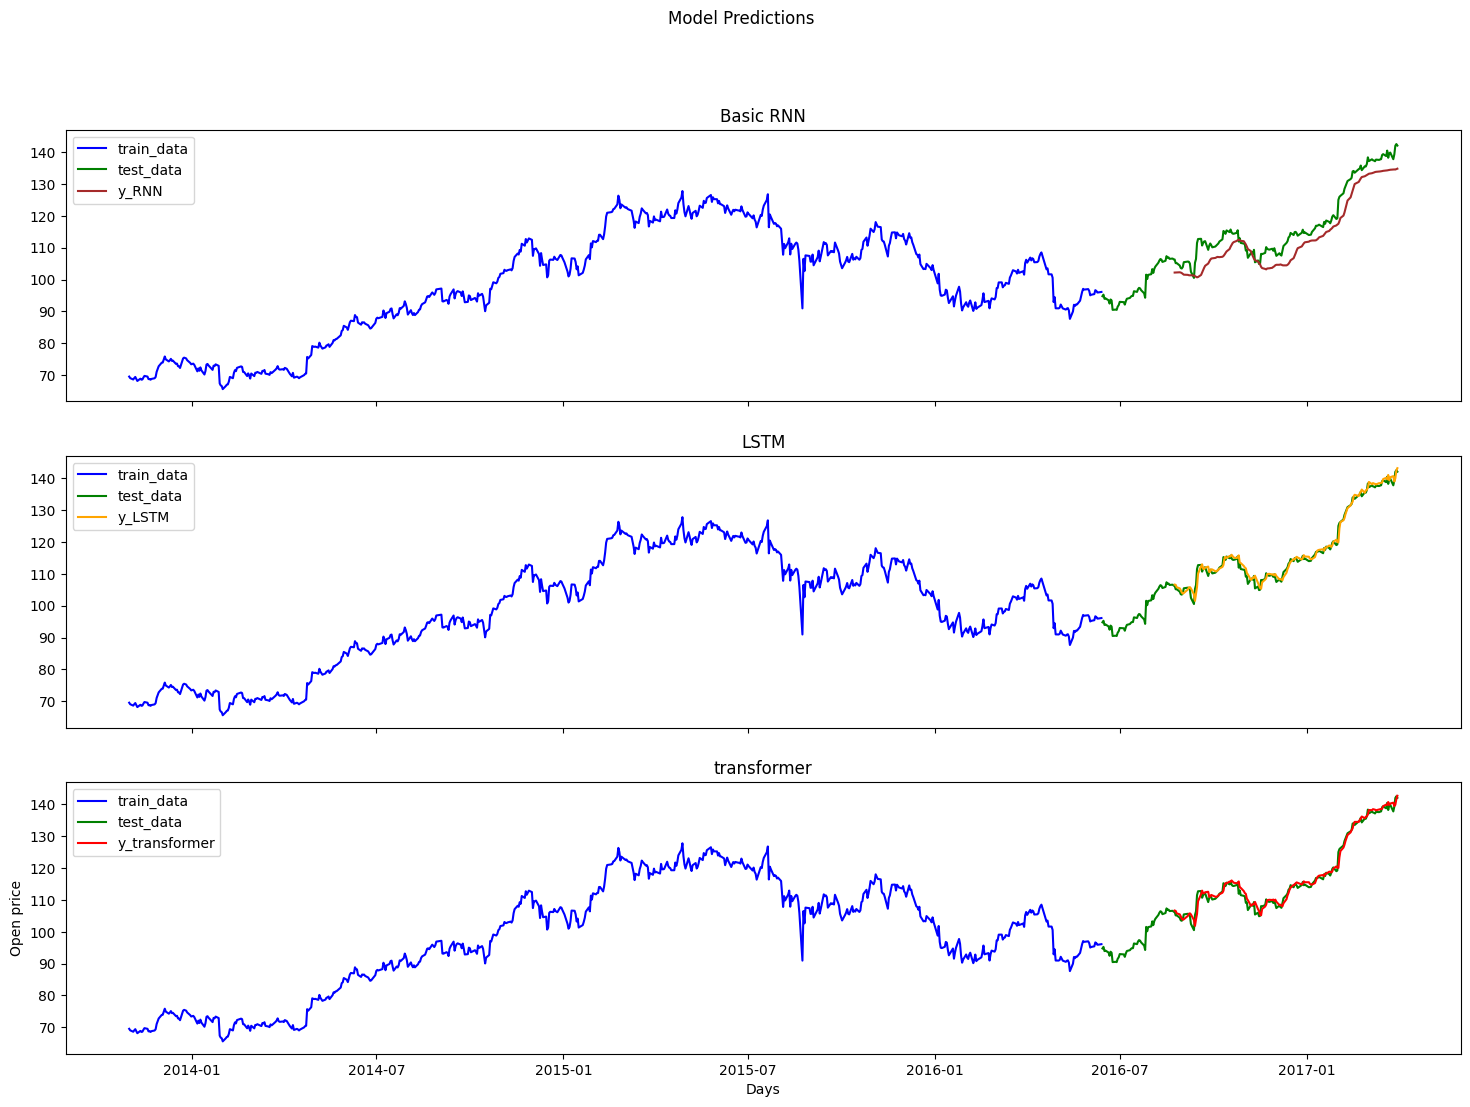

In [19]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for transformer predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_transformer_0, label = "y_transformer", color = "red")
axs[2].legend()
axs[2].title.set_text("transformer")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


In [20]:
regressor.save('APPLE_RNN.keras')
regressorLSTM.save('APPLE_LSTM.keras')
transformer.save('APPLE_TRANS.keras')